<div style="text-align: center;">
  <h1>Análisis Comparativo del Uso de Bicicletas entre Socios Anuales y Usuarios Ocasionales de Cyclistic</h1>
  <h2>Ronaldo Caro</h2>
  <h2>04/08/24</h2>
</div>

<h3>1. Instrucción de la Tarea Empresarial</h3>
<p><strong>Descripción del Problema:</strong> Se ha identificado que los miembros anuales de Cyclistic generan ingresos significativamente mayores en comparación con los usuarios ocasionales. Por tanto, se considera que incrementar el número de suscriptores anuales es esencial para el crecimiento futuro de la compañía. Con este objetivo, se planea desarrollar una estrategia de marketing enfocada en convertir a los usuarios ocasionales en miembros anuales. Para ello, es crucial comprender las diferencias en el comportamiento de uso entre ambos grupos respecto a la utilización de las bicicletas de Cyclistic..</p>
<p><strong>Objetivos del Análisis:</strong></p>
<ul>
  <li>Objetivo 1: Identificar las diferencias entre los miembros con membresías anuales y ocasionales.</li>
  <li>Objetivo 2: Determinar por qué usuarios ocasionales comprarían membresías anuales.</li>
  <li>Objetivo 3: Proponer recomendaciones para el diseño de la estrategia de marketing.</li>
</ul>
<p><strong>Alcance del Proyecto:</strong></p>
<ul>
  <li>Período de análisis: Junio 24 a Junio 2024</li>
  <li>Datos a utilizar: Data proporcionada por Motivate International Inc. <a href="https://www.divvybikes.com/data-license-agreement" target="_blank">(Licencia)</a></li>
  <li>Exclusiones: Prohibido usar información de identificación personal de los ciclistas.</li>
</ul>
<p><strong>Criterios de Éxito:</strong></p>
<ul>
  <li>Generar un informe detallado con la descripción de la tarea empresarial, fuentes de datos utilizado, documentación del proceso de limpieza y análisis con visualizaciones de respaldo y hallazgos claves.</li>
  <li>Proponer al menos tres recomendaciones basadas en los hallazgos.</li>
</ul>
<hr>

<h3>2. Descripción de las Fuentes de Datos</h3>
    <ul>
      <li><strong>Descripción:</strong> Se obtuvieron datos de los viajes de los últimos 12 meses de la fecha: Julio 2023 a junio 2024, de las bicicletas de Cyclistic. </li>
      <li><strong>Tipo de datos:</strong> Los datos se encuentran estructurados en archivos csv por mes. Los datos nos dan información de cada viaje en las siguientes categorías: fecha y hora de salida, y llegada; estación de salida y llegada; y tipo de membresía del conductor (casual o miembro). No se guardan datos personales.</li>
      <li><strong>Origen:</strong> Datos obtenidos de la web de Motivated International Inc. <a href="https://divvy-tripdata.s3.amazonaws.com/index.html" target="_blank">(Fuente de datos)</a></li>
      <li><strong>Fecha de obtención:</strong> 01-08-24</li>
    </ul>
  </li>
<hr>

<h3>3. Documentación de Limpieza y Manipulación de Datos</h3>
<ul>
<li><strong>Herramientas utilizadas</strong></li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ul>
<li><strong>Lectura de datos</strong> Cada archivo csv es almacenada en una variable con el formato month_yy (Ejemplo: july_23) del tipo dataframe de pandas. Todos los data frames son almacenados en el diccionario total_df.</li>
</ul>

In [3]:
%run read_csv_files.py

In [4]:
total_df = {'Jul 23': july_23, 'Aug 23': august_23, 'Sep 23': sept_23, 'Oct 23': oct_23, 'Nov 23': nov_23, 'Dec 23': dec_23,
           'Jan 24': january_24, 'Feb 24': feb_24, 'Mar 24': mar_24, 'Apr 24': apr_24, 'May 24': may_24, 'Jun 24': jun_24}

In [5]:
july_23.head(6)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.884069,-87.656853,41.885779,-87.651025,member


<ul>
<li><strong>Eliminar las filas con valores nulos</strong></li>
</ul>

In [6]:
for value in total_df.values():
    value.dropna(inplace = True)

<ul>
<li><strong>Formatear las columnas que tienen valores del tipo tiempo al tipo datetime</strong></li>
</ul>

In [7]:
for value in total_df.values():
    value['started_at'] = pd.to_datetime(value['started_at'], format = 'mixed')
    value['ended_at'] = pd.to_datetime(value['ended_at'], format = 'mixed')

<ul>
<li><strong>Agregar columnas ride_length y day_of _week</strong> Indican el tiempo de viaje y el día de la semana en qué se realizó.</li>
</ul>

In [8]:
for value in total_df.values():
    value['ride_length'] = value['ended_at'] - value['started_at']
    value['day_of_week'] = value['started_at'].dt.day_name()

<ul>
<li><strong>Almacenar los datos en un solo dataframe y clasificarlos por usuario</strong></li>
</ul>

In [9]:
total_member = {}
total_casual = {}

for key, value in total_df.items():
    total_member[key] = value[value['member_casual'] == 'member']
    total_casual[key] = value[value['member_casual'] == 'casual']

combined_df = pd.concat(total_df.values(), ignore_index = True)
combined_df.head(6)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,Sunday
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,Sunday
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,Sunday
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,Friday
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,Saturday
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.884069,-87.656853,41.885779,-87.651025,member,0 days 00:04:54,Monday


In [10]:
member = combined_df[combined_df['member_casual'] == 'member'] # dataframe solo de miembros
casual = combined_df[combined_df['member_casual'] == 'casual'] # dataframe solo de usuarios casuales

print('{:<10} {:<30}'.format('Cantidad de viajes realizados por miembros: ', len(member)))
print('{:<10} {:<30}'.format('Cantidad de viajes realizados por usuarios casuales: ', len(casual)))

Cantidad de viajes realizados por miembros:  2770653                       
Cantidad de viajes realizados por usuarios casuales:  1503695                       


<h3>4. Resumen del Análisis</h3>
<ul>
<li><strong>Promedio y máximo del tiempo de viaje para cada uno de los meses</strong></li>
</ul>

In [11]:
total_mean_ride_length = {} # Almacena el promedio de ride_length para cada uno de los meses
total_max_ride_length = {} # Almacena el máximo de ride_length para cada uno de los meses 

for key, value in total_df.items():
    mean_ride_length = value['ride_length'].mean()
    total_mean_ride_length[key] = mean_ride_length
    
    max_ride_length = value['ride_length'].max()
    total_max_ride_length[key] = max_ride_length

mean_ride_length = combined_df["ride_length"].mean() # Promedio de ride_length para los doce meses
max_ride_length = combined_df["ride_length"].max() # Máximo valor de ride_length para los doce meses

data_mean_max_ride_length = {'month yy': total_df.keys(), 
                             'mean ride_length': total_mean_ride_length.values(), 
                             'max ride_lenght': total_max_ride_length.values()}
mean_max_ride_length_df = pd.DataFrame(data = data_mean_max_ride_length)
mean_groupBy_day_user = combined_df.groupby(['member_casual', 'day_of_week'])['ride_length'].mean() # media para todos meses por usuario
mean_max_ride_length_df

,month yy,mean ride_length,max ride_lenght
0,Jul 23,0 days 00:18:25.285134103,1 days 16:57:51
1,Aug 23,0 days 00:17:43.615741666,4 days 18:51:13
2,Sep 23,0 days 00:16:53.695123708,1 days 00:57:54
3,Oct 23,0 days 00:14:47.305301636,1 days 00:55:34
4,Nov 23,0 days 00:12:50.393860217,1 days 00:57:30
5,Dec 23,0 days 00:12:03.658944735,1 days 00:54:28
6,Jan 24,0 days 00:12:10.440100871,1 days 00:57:19
7,Feb 24,0 days 00:13:24.794723280,1 days 00:57:39
8,Mar 24,0 days 00:14:18.040481504,1 days 01:09:22
9,Apr 24,0 days 00:16:13.395476128,1 days 00:53:33


<ul>
<li><strong>Obtener la moda de day_of_week</strong></li>
</ul>

In [12]:
total_mode_day_of_week = {} # Almacena el modo de day_of_week para cada uno de los meses

for key, value in total_df.items():
    mode_day_of_week = value['day_of_week'].mode()
    total_mode_day_of_week[key] = mode_day_of_week[0]
    
mode_day_of_week = combined_df['day_of_week'].mode() # Almacena el modo de day_of_week en total

data_mode_day = {'month yy': total_mode_day_of_week.keys(), 
                'mode day_of_week': total_mode_day_of_week.values()}
mode_day_df = pd.DataFrame(data = data_mode_day)
mode_day_df

,month yy,mode day_of_week
0,Jul 23,Saturday
1,Aug 23,Wednesday
2,Sep 23,Saturday
3,Oct 23,Tuesday
4,Nov 23,Thursday
5,Dec 23,Friday
6,Jan 24,Wednesday
7,Feb 24,Thursday
8,Mar 24,Saturday
9,Apr 24,Tuesday


<ul>
<li><strong>Calcular el promedio de ride_length por usuario (miembro o casual)</strong></li>
</ul>

In [13]:
total_mean_ride_length_member = {} # Almacena el promedio de ride_length de miembros para c\u de los meses
total_mean_ride_length_casual = {} # Almacena el promedio de ride_length de los usuarios casuales para c\u de los meses

for key, value in total_df.items():
    member = value[value['member_casual'] == 'member']
    casual = value[value['member_casual'] == 'casual']

    mean_ride_length_member = member['ride_length'].mean()
    mean_ride_length_casual = casual['ride_length'].mean()

    total_mean_ride_length_member[key] = mean_ride_length_member
    total_mean_ride_length_casual[key] = mean_ride_length_casual
    

member = combined_df[combined_df['member_casual'] == 'member'] # dataframe solo de miembros
casual = combined_df[combined_df['member_casual'] == 'casual'] # dataframe solo de usuarios casuales

mean_ride_length_member = member['ride_length'].mean() # promedio total de ride_length solo para miembros
mean_ride_length_casual = casual['ride_length'].mean() # promedio total de ride_length solo para usuarios casuales

data_mean_ride_usur = {'month yy': total_df.keys(),
                      'mean ride_length by member': total_mean_ride_length_member.values(),
                      'mean ride_length by casual': total_mean_ride_length_casual.values()}
mean_ride_usur_df = pd.DataFrame(data = data_mean_ride_usur)
mean_ride_usur_df

,month yy,mean ride_length by member,mean ride_length by casual
0,Jul 23,0 days 00:13:21.023373414,0 days 00:25:12.958731155
1,Aug 23,0 days 00:13:18.660784531,0 days 00:24:21.364279727
2,Sep 23,0 days 00:12:40.363463159,0 days 00:23:31.988561361
3,Oct 23,0 days 00:11:38.876960373,0 days 00:21:22.789347659
4,Nov 23,0 days 00:11:03.076570909,0 days 00:17:52.116842587
5,Dec 23,0 days 00:10:48.180220302,0 days 00:16:32.064547783
6,Jan 24,0 days 00:11:33.252167126,0 days 00:15:32.188787895
7,Feb 24,0 days 00:11:44.622211154,0 days 00:19:49.439324076
8,Mar 24,0 days 00:11:24.068602686,0 days 00:22:01.783639228
9,Apr 24,0 days 00:12:17.019401140,0 days 00:24:46.320286553


<ul>
<li><strong>viajes por usuario (member o casual) por day_of_week</strong></li>
</ul>

In [14]:
total_trips_member_by_day = {}
total_trips_casual_by_day = {}

for key in total_df.keys():
    count_trips_by_months_member =  total_member[key].groupby('day_of_week')['day_of_week'].count()
    count_trips_by_months_casual =  total_casual[key].groupby('day_of_week')['day_of_week'].count()

    total_trips_casual_by_day[key] = np.array(count_trips_by_months_casual.values)
    total_trips_member_by_day[key] = np.array(count_trips_by_months_member.values)

    days = list(count_trips_by_months_member.index) 

In [15]:
total_group_trips_member = {'Day': days}

for month, values in total_trips_member_by_day.items():
    total_group_trips_member[month] = values

count_trips_by_months_member_df = pd.DataFrame(data = total_group_trips_member)
count_trips_by_months_member_df['sum'] = count_trips_by_months_member_df.iloc[:, 1:].sum(axis=1)
print('\t\t\tCantidad de viajes de miembros por día de semanana')
count_trips_by_months_member_df

			Cantidad de viajes de miembros por día de semanana


,Day,Jul 23,Aug 23,Sep 23,Oct 23,Nov 23,Dec 23,Jan 24,Feb 24,Mar 24,Apr 24,May 24,Jun 24,sum
0,Friday,44016,47772,53516,32413,25594,21933,10813,19353,21453,24442,46049,38057,385411
1,Monday,56927,40359,33835,46333,28933,16836,15889,21644,25785,37066,32298,39202,395107
2,Saturday,48368,39918,51790,26528,22704,17065,7528,11833,24022,26468,35485,38250,349959
3,Sunday,42922,36514,34183,34719,19451,13512,7100,14064,19626,22384,27512,41800,313787
4,Thursday,49593,58931,47835,38272,38983,21708,18042,29874,23314,26509,44729,43205,440995
5,Tuesday,45832,64348,41614,52625,29959,17962,15422,25891,27163,40335,35115,41147,437413
6,Wednesday,41006,63221,46898,42591,37077,21441,21301,23907,26094,26650,53497,44298,447981


In [16]:
total_group_trips_casual = {'Day': days}

for month, values in total_trips_casual_by_day.items():
    total_group_trips_casual[month] = values

count_trips_by_months_casual_df = pd.DataFrame(data = total_group_trips_casual)
count_trips_by_months_casual_df['sum'] = count_trips_by_months_casual_df.iloc[:, 1:].sum(axis=1)
print('\t\t\tCantidad de viajes de usuarios casuales por día de semanana')
count_trips_by_months_casual_df

			Cantidad de viajes de usuarios casuales por día de semanana


,Day,Jul 23,Aug 23,Sep 23,Oct 23,Nov 23,Dec 23,Jan 24,Feb 24,Mar 24,Apr 24,May 24,Jun 24,sum
0,Friday,31938,36358,33726,14984,9482,6678,2234,5289,7316,9992,28189,27353,213539
1,Monday,36434,20250,19707,18015,7961,3537,2862,5160,8024,14304,18032,21290,175576
2,Saturday,53369,42549,52519,18832,13802,6931,1857,4188,15270,22572,37588,42021,311498
3,Sunday,44948,35840,33843,27846,10451,5313,1751,5950,11616,18612,26026,46209,268405
4,Thursday,28368,33429,20948,14102,12959,5414,3176,6432,6334,7389,19998,24207,182756
5,Tuesday,29764,31699,16939,19851,7577,3786,2514,6064,7543,13374,13977,20627,173715
6,Wednesday,20473,33731,19282,16670,9865,5027,3319,5087,6718,7701,23673,26660,178206


<h3>5. Visualizaciones y hallazgos clave</h3>
<ul>
<li><strong>Comparación de tiempo de viaje por tipo de usuario</strong></li>
    <p>El promedio de tiempo de viaje de los usuarios casuales decrece cada mes durante el segundo semestre del año 2023 y vuelve a crecer cada mes el primer semestre del año 2024. Se nota ligeramente esta tendencia para los miembros, pero no considerablemente.</p>
</ul>

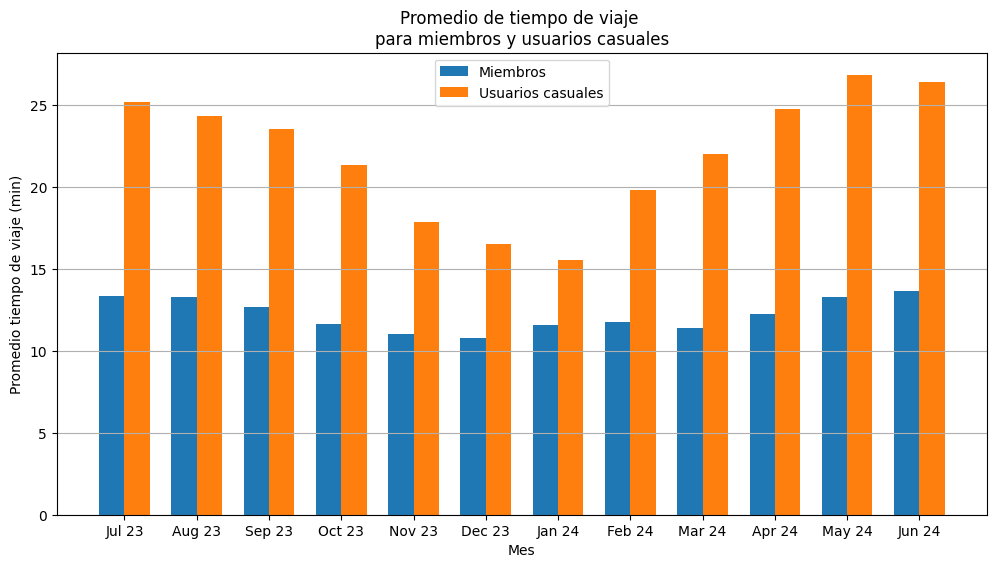

In [17]:
x = ['Jul 23', 'Aug 23', 'Sep 23', 'Oct 23', 'Nov 23', 'Dec 23', 
     'Jan 24', 'Feb 24', 'Mar 24', 'Apr 24', 'May 24', 'Jun 24']
y_member = [time.total_seconds() / 60 for time in total_mean_ride_length_member.values()]
y_casual = [time.total_seconds() / 60 for time in total_mean_ride_length_casual.values()]

n = len(x)
bar_width = 0.35 
index = np.arange(n)  

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width/2, y_member, bar_width, label='Miembros')
plt.bar(index + bar_width/2, y_casual, bar_width, label='Usuarios casuales')

plt.xlabel('Mes')
plt.ylabel('Promedio tiempo de viaje (min)')
plt.title('Promedio de tiempo de viaje \npara miembros y usuarios casuales')
plt.xticks(index, x)
plt.legend()

plt.grid(axis='y')  
plt.show()

<ul>
<li><strong>Tipo de bicicletas preferidas entre usuarios</strong></li>
    <p>En su mayoría, Tanto los miembros como los usuarios casuales prefieren las bicicletas clásicas sobre las eléctricas. Sin embargo, un mayor porcentaje de viajes realizados por usuarios casuales se hizo en bicicletas eléctricas (34.1%) en comparación con los miembros (31.9%).</p>
</ul>

([<matplotlib.patches.Wedge at 0x1fe8ea73b30>,
 [Text(-0.1410440011027481, -1.0909200657027665, 'classic bike'),
  Text(0.14104364563586375, 1.0909201116606775, 'electric bike')],
 [Text(-0.07693309151058986, -0.5950473085651453, '68.1%'),
  Text(0.07693289761956203, 0.5950473336330968, '31.9%')])

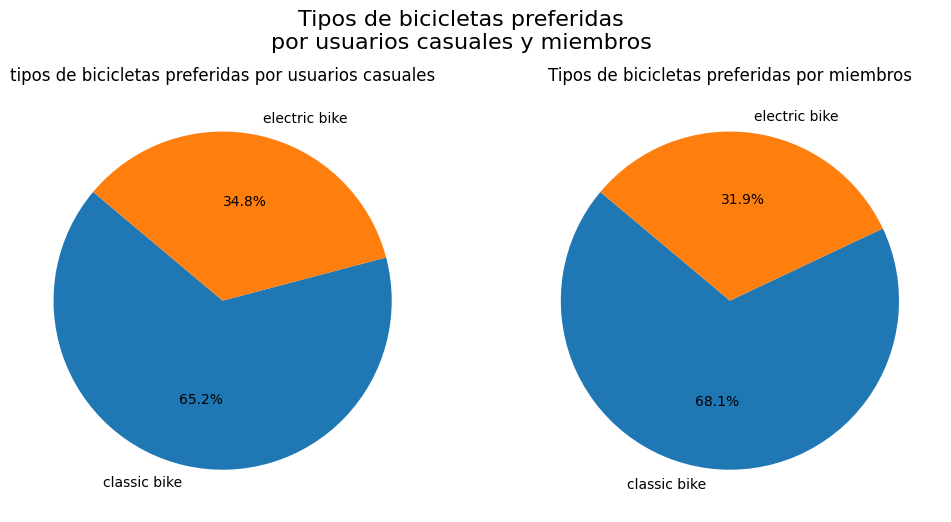

In [20]:
x1 = ['classic bike', 'electric bike']
x2  = ['classic bike', 'electric bike']

y_casual = casual[casual['rideable_type'] != 'docked_bike'].groupby('rideable_type')['rideable_type'].count()
y_member = member.groupby('rideable_type')['rideable_type'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Tipos de bicicletas preferidas\npor usuarios casuales y miembros', fontsize=16)

ax1.set_title('tipos de bicicletas preferidas por usuarios casuales')
ax1.pie(y_casual, labels=x1, autopct='%1.1f%%', startangle=140)

ax2.set_title('Tipos de bicicletas preferidas por miembros')
ax2.pie(y_member, labels=x2, autopct='%1.1f%%', startangle=140)

<ul>
<li><strong>Días mayor transitados por usuarios</strong></li>
    <p>Tenemos un mayor flujo de usuarios casuales durante los fines de semana. En comparación, los miembros presentan menor tránsito los fines de semana, aunque el flujo está distribuido mas equitativamente.</p>
</ul>

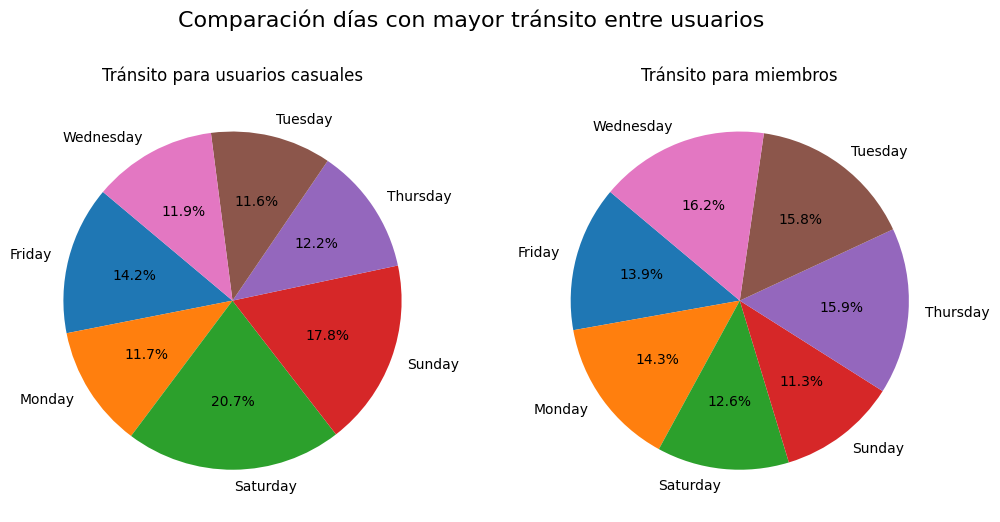

In [21]:
x_casual = np.array(count_trips_by_months_casual_df['Day'])
y_casual = np.array(count_trips_by_months_casual_df['sum'])

x_member = np.array(count_trips_by_months_member_df['Day'])
y_member = np.array(count_trips_by_months_member_df['sum'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Comparación días con mayor tránsito entre usuarios', fontsize=16)

ax1.pie(y_casual, labels=x_casual, autopct='%1.1f%%', startangle=140)
ax1.set_title('Tránsito para usuarios casuales')
ax2.pie(y_member, labels=x_member, autopct='%1.1f%%', startangle=140)
ax2.set_title('Tránsito para miembros')

plt.show()

<h3>6. Conclusiones y recomendaciones</h3>
<p>Los hallazgos indican que los miembros utilizan las bicicletas casi diariamente, manteniendo un uso constante a lo largo del año, independientemente de la estación. En contraste, se observa una disminución en la cantidad de usuarios casuales durante el invierno. Por lo tanto, nuestras recomendaciones se centrarán en promover la idea de que las bicicletas son una alternativa viable de transporte en cualquier estación del año.</p>
<p><strong>Recomendación 1: </strong>Incluir incentivos como tarifas reducidas o la posibilidad de congelar la membresía durante un período específico sin costo adicional.</p>
<ul>
  <li>Justificación: la congelación de la membresía o las tarifas reducidas ofrece una mayor flexibilidad a los usuarios, especialmente para aquellos que pueden tener dudas sobre el uso continuo del servicio durante condiciones climáticas adversas o situaciones personales que puedan limitar su uso. </li>
</ul>
<p><strong>Recomendación 2: </strong>Compartir historias y testimonios de miembros que usan bicicletas durante todo el año</p>
<ul>
  <li>Justificación:  Las historias de miembros que usan bicicletas durante todo el año pueden inspirar y motivar a los usuarios casuales a considerar la posibilidad de un uso más regular, independientemente de la estación. Compartir historias y testimonios de miembros reales añade una capa de autenticidad y credibilidad.</li>
</ul>
<p><strong>Recomendación 3: </strong>Promoción de las Ventajas de las Bicicletas Eléctricas</p>
<ul>
  <li>Justificación: Para incentivar a los usuarios a probar bicicletas eléctricas o a aquellos que ya estén interasados a adquirir una membresía, se recomienda informar sobre sus ventajas, como la facilidad para recorrer largas distancias, afrontar terrenos difíciles con menos esfuerzo y superar climas adversos.</li>
</ul>
<hr>